# SQLAlchemy Exploration

In [167]:
# SQLAlchemy connecting mta.db with python
engine = create_engine("sqlite:///mta.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)
all_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,03:00:00,REGULAR,7495312,2551701
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,07:00:00,REGULAR,7495318,2551711
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,11:00:00,REGULAR,7495333,2551756
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,15:00:00,REGULAR,7495436,2551802
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,19:00:00,REGULAR,7495596,2551834


In [175]:
all_data2 = pd.read_sql('SELECT CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS \
                         FROM mta_data;', engine)
all_data2.head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,11/28/2020,7495312,2551701
1,A002,R051,02-00-00,59 ST,11/28/2020,7495318,2551711
2,A002,R051,02-00-00,59 ST,11/28/2020,7495333,2551756
3,A002,R051,02-00-00,59 ST,11/28/2020,7495436,2551802
4,A002,R051,02-00-00,59 ST,11/28/2020,7495596,2551834


In [193]:
query = '''
SELECT *
FROM mta_data
WHERE (STATION='59 ST') AND (LINENAME='NQR456W')
'''
data2 = pd.read_sql_query(query, engine)
data2

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,03:00:00,REGULAR,7495312,2551701
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,07:00:00,REGULAR,7495318,2551711
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,11:00:00,REGULAR,7495333,2551756
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,15:00:00,REGULAR,7495436,2551802
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/28/2020,19:00:00,REGULAR,7495596,2551834
...,...,...,...,...,...,...,...,...,...,...,...
8488,A002,R051,02-06-00,59 ST,NQR456W,BMT,03/26/2021,04:00:00,REGULAR,114480,17026
8489,A002,R051,02-06-00,59 ST,NQR456W,BMT,03/26/2021,08:00:00,REGULAR,114516,17034
8490,A002,R051,02-06-00,59 ST,NQR456W,BMT,03/26/2021,12:00:00,REGULAR,114574,17044
8491,A002,R051,02-06-00,59 ST,NQR456W,BMT,03/26/2021,16:00:00,REGULAR,114725,17057


In [199]:
query2 = '''
SELECT *
FROM mta_data
WHERE LINENAME LIKE 'N%'
GROUP BY STATION
'''

data3 = pd.read_sql_query(query2, engine)
data3

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,D008,R392,00-00-00,18 AV,N,BMT,11/28/2020,00:00:00,REGULAR,8030154,7874845
1,D009,R393,00-00-00,20 AV,N,BMT,11/28/2020,00:00:00,REGULAR,317661,250573
2,A030,R083,01-00-00,23 ST,NRW,BMT,11/28/2020,03:00:00,REGULAR,36408,39575
3,A027,R082,01-00-00,28 ST,NRW,BMT,11/28/2020,03:00:00,REGULAR,3897670,4724433
4,R513,R093,00-00-00,30 AV,NQW,BMT,11/28/2020,03:00:00,REGULAR,384652,1305662
5,R511,R091,00-00-00,36 AV,NQW,BMT,11/28/2020,03:00:00,REGULAR,17820664,8868092
6,R510,R090,00-00-00,39 AV,NQW,BMT,11/28/2020,03:00:00,REGULAR,2558897,1347140
7,A013,R081,01-00-00,49 ST,NQRW,BMT,11/28/2020,03:00:00,REGULAR,6240699,38798747
8,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,11/28/2020,01:00:00,REGULAR,4371492,7529235
9,A010,R080,00-00-00,57 ST-7 AV,NQRW,BMT,11/28/2020,03:00:00,REGULAR,5038969,2901775


In [206]:
query3 = '''
SELECT STATION,COUNT(STATION), ENTRIES
FROM mta_data
GROUP BY STATION
HAVING COUNT(STATION) > 2
'''

data4 = pd.read_sql_query(query3, engine)
data4

,STATION,COUNT(STATION),ENTRIES
0,1 AV,17146,15501413
1,103 ST,10704,14857286
2,103 ST-CORONA,6421,16270444
3,104 ST,6544,168709
4,110 ST,4269,5060854
...,...,...,...
373,WOODLAWN,3585,8820679
374,WORLD TRADE CTR,12801,953526
375,WTC-CORTLANDT,24942,104
376,YORK ST,2142,96726


# Data Exploration using Pandas

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210109, 210116, 210123, 210130,
             210206, 210213, 210220, 210227, 
             210306, 210313, 210320, 210327,
             210403]
turnstiles_df = get_data(week_nums)

In [3]:
#converting the above data into one big csv file
#turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False)

In [6]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME,
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,03:00:00,REGULAR,7511653,2558871,2021-01-02 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,07:00:00,REGULAR,7511655,2558877,2021-01-02 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,11:00:00,REGULAR,7511677,2558930,2021-01-02 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,15:00:00,REGULAR,7511766,2558968,2021-01-02 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2021,19:00:00,REGULAR,7511912,2558999,2021-01-02 19:00:00


In [7]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
#(turnstiles_df
# .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
# .ENTRIES.count()
# .reset_index()
# .sort_values("ENTRIES", ascending=False)).head(5)

In [8]:
#turnstiles_df.DESC.value_counts() #check number of RECOVR AUD

In [9]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [10]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
209067,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/02/2021,21:00:00,5554,544,2021-04-02 21:00:00
209066,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/02/2021,17:00:00,5554,544,2021-04-02 17:00:00
209065,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/02/2021,13:00:00,5554,544,2021-04-02 13:00:00
209064,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/02/2021,09:00:00,5554,544,2021-04-02 09:00:00
209063,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/02/2021,05:00:00,5554,544,2021-04-02 05:00:00


In [11]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/02/2021,7511996
1,A002,R051,02-00-00,59 ST,01/03/2021,7512214
2,A002,R051,02-00-00,59 ST,01/04/2021,7512754
3,A002,R051,02-00-00,59 ST,01/05/2021,7513300
4,A002,R051,02-00-00,59 ST,01/06/2021,7513790
...,...,...,...,...,...,...
454004,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/29/2021,5554
454005,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/30/2021,5554
454006,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/31/2021,5554
454007,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/01/2021,5554


In [12]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                    .shift(1))
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/02/2021,7511996,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/03/2021,7512214,01/02/2021,7511996.0
2,A002,R051,02-00-00,59 ST,01/04/2021,7512754,01/03/2021,7512214.0
3,A002,R051,02-00-00,59 ST,01/05/2021,7513300,01/04/2021,7512754.0
4,A002,R051,02-00-00,59 ST,01/06/2021,7513790,01/05/2021,7513300.0


In [13]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [14]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-03-02  59 ST               1
A011  R080  01-03-00  57 ST-7 AV         90
            01-03-01  57 ST-7 AV          1
A025  R023  01-06-00  34 ST-HERALD SQ     1
A031  R083  00-00-01  23 ST               1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        89
R624  R124  00-00-02  KINGSTON AV         1
R627  R063  00-03-02  SUTTER AV-RUTLD     1
R730  R431  00-00-04  EASTCHSTER/DYRE    90
S101  R070  00-00-04  ST. GEORGE          1
Length: 205, dtype: int64

In [15]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 238 <-- 6641395.0
entries: 52806 <-- 17116894.0
entries: 117 <-- 11715665.0
entries: 198 <-- 5102094.0
entries: 327680 <-- 185586773.0
entries: 169 <-- 2172444.0
entries: 127 <-- 1657032.0
entries: 80 <-- 1640812.0
entries: 327834 <-- 2642486.0
entries: 16796392 <-- 123975.0
entries: 453044031 <-- 1779426.0
entries: 262272 <-- 2255518.0
entries: 393225 <-- 7714275.0
entries: 57 <-- 2028804.0
entries: 16712028 <-- 6294957.0
entries: 177 <-- 16712669.0
entries: 262144 <-- 33554713.0
entries: 394 <-- 2773389.0
entries: 106 <-- 67960951.0
entries: 147 <-- 11567738.0
entries: 1950 <-- 13809288.0
entries: 54 <-- 7903750.0
entries: 2293788 <-- 4259642.0
entries: 471 <-- 1377273.0
entries: 248 <-- 827160459.0
entries: 0 <-- 67108864.0
entries: 47 <-- 2514854.0
entries: 1376376 <-- 8181460.0
entries: 420 <-- 4343900.0
entries: 262297 <-- 1566066.0
entries: 23157312 <-- 1627480738.0
entries: 35 <-- 10195434.0
entries: 702 <-- 3651815.0
entries: 697 <-- 13204039.0
entries: 262152 <-- 671

In [16]:
turnstiles_daily.DAILY_ENTRIES.describe()

count    448972.000000
mean        350.307641
std        6024.213610
min           0.000000
25%          51.000000
50%         189.000000
75%         398.000000
max      984026.000000
Name: DAILY_ENTRIES, dtype: float64

In [17]:
# daily entries for each station
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/03/2021,2547.0
1,1 AV,01/04/2021,5303.0
2,1 AV,01/05/2021,5468.0
3,1 AV,01/06/2021,5603.0
4,1 AV,01/07/2021,5665.0
...,...,...,...
34004,ZEREGA AV,03/29/2021,1012.0
34005,ZEREGA AV,03/30/2021,1093.0
34006,ZEREGA AV,03/31/2021,1011.0
34007,ZEREGA AV,04/01/2021,1051.0


In [18]:
# total ridership for unique station
station_total = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)
station_total

,STATION,DAILY_ENTRIES
59,34 ST-HERALD SQ,3004542.0
61,34 ST-PENN STA,2889380.0
0,1 AV,2688395.0
233,GRD CNTRL-42 ST,2563142.0
352,TIMES SQ-42 ST,2398335.0
...,...,...
332,ROCKAWAY PARK B,19737.0
148,BEACH 98 ST,9852.0
162,BROAD CHANNEL,7612.0
300,NEWARK HM HE,4800.0


In [19]:
#plt.figure(figsize=(10,8))
#plt.plot(station_total["STATION"], station_total["DAILY_ENTRIES"])
#plt.xlabel('Stations')
#plt.ylabel('Daily Entries')
#plt.xticks(rotation=45)
#plt.title('Total Ridership for each unique Station');

In [20]:
#plt.figure(figsize=(10,8))
#plt.plot(station_total["STATION"][0:10], station_total["DAILY_ENTRIES"][0:10])
#plt.xlabel('Stations')
#plt.ylabel('Daily Entries')
#plt.xticks(rotation=45)
#plt.title('Total Ridership for top 10 Station');

# Divide the data by Interval

In [21]:
turnstiles_df.sort_values(by = ["DATE", "DATE_TIME"], ascending=[False, False], inplace=True)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
120528,PTH05,R543,00-00-03,EXCHANGE PLACE,1,PTH,04/02/2021,23:59:10,402685,85964,2021-04-02 23:59:10
119768,PTH04,R551,00-00-03,GROVE STREET,1,PTH,04/02/2021,23:59:09,10526,80481,2021-04-02 23:59:09
122762,PTH10,R547,00-00-03,9TH STREET,1,PTH,04/02/2021,23:58:16,50423,172030,2021-04-02 23:58:16
122522,PTH09,R548,00-00-01,CHRISTOPHER ST,1,PTH,04/02/2021,23:57:14,684655,557364,2021-04-02 23:57:14
119019,PTH03,R552,00-00-0A,JOURNAL SQUARE,1,PTH,04/02/2021,23:56:54,65685,961453,2021-04-02 23:56:54
...,...,...,...,...,...,...,...,...,...,...,...
5072,A033,R170,02-00-04,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,6914262,5399776,2021-01-02 00:00:00
5031,A033,R170,02-00-03,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,7507785,8870432,2021-01-02 00:00:00
4990,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,15196697,14786305,2021-01-02 00:00:00
4949,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,2581423,3160949,2021-01-02 00:00:00


In [22]:
# ideal interval(8 hours interval) that was used for the project

def commute_interval(DATE_TIME):
    if DATE_TIME.hour >= 6 and DATE_TIME.hour < 14:
        return '06:00-14:00'
    elif DATE_TIME.hour >= 14 and DATE_TIME.hour < 22:
        return '14:00-22:00'
    elif DATE_TIME.hour >= 22 and DATE_TIME.hour < 24:
        return '22:00-06:00'
    elif DATE_TIME.hour >= 0 and DATE_TIME.hour < 6:
        return '22:00-06:00'
    else:
        return 'GO HOME'

In [23]:
# .apply the created function above
turnstiles_df['INTERVAL'] = turnstiles_df.DATE_TIME.apply(commute_interval)

In [24]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,INTERVAL
120528,PTH05,R543,00-00-03,EXCHANGE PLACE,1,PTH,04/02/2021,23:59:10,402685,85964,2021-04-02 23:59:10,22:00-06:00
119768,PTH04,R551,00-00-03,GROVE STREET,1,PTH,04/02/2021,23:59:09,10526,80481,2021-04-02 23:59:09,22:00-06:00
122762,PTH10,R547,00-00-03,9TH STREET,1,PTH,04/02/2021,23:58:16,50423,172030,2021-04-02 23:58:16,22:00-06:00
122522,PTH09,R548,00-00-01,CHRISTOPHER ST,1,PTH,04/02/2021,23:57:14,684655,557364,2021-04-02 23:57:14,22:00-06:00
119019,PTH03,R552,00-00-0A,JOURNAL SQUARE,1,PTH,04/02/2021,23:56:54,65685,961453,2021-04-02 23:56:54,22:00-06:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5072,A033,R170,02-00-04,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,6914262,5399776,2021-01-02 00:00:00,22:00-06:00
5031,A033,R170,02-00-03,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,7507785,8870432,2021-01-02 00:00:00,22:00-06:00
4990,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,15196697,14786305,2021-01-02 00:00:00,22:00-06:00
4949,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,01/02/2021,00:00:00,2581423,3160949,2021-01-02 00:00:00,22:00-06:00


In [25]:
turnstiles_interval = (turnstiles_df
                        .groupby(["STATION", "DATE", "INTERVAL"],as_index=False)
                        .ENTRIES.first())

In [26]:
turnstiles_interval[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_interval
                                                       .groupby(["STATION", "INTERVAL"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [27]:
turnstiles_interval.tail(10)

,STATION,DATE,INTERVAL,ENTRIES,PREV_DATE,PREV_ENTRIES
103127,ZEREGA AV,03/30/2021,22:00-06:00,39,03/29/2021,39.0
103128,ZEREGA AV,03/31/2021,06:00-14:00,39,03/30/2021,39.0
103129,ZEREGA AV,03/31/2021,14:00-22:00,39,03/30/2021,39.0
103130,ZEREGA AV,03/31/2021,22:00-06:00,39,03/30/2021,39.0
103131,ZEREGA AV,04/01/2021,06:00-14:00,39,03/31/2021,39.0
103132,ZEREGA AV,04/01/2021,14:00-22:00,39,03/31/2021,39.0
103133,ZEREGA AV,04/01/2021,22:00-06:00,39,03/31/2021,39.0
103134,ZEREGA AV,04/02/2021,06:00-14:00,39,04/01/2021,39.0
103135,ZEREGA AV,04/02/2021,14:00-22:00,39,04/01/2021,39.0
103136,ZEREGA AV,04/02/2021,22:00-06:00,39,04/01/2021,39.0


In [28]:
# check how many rows exists for ENTRIES = PREV_ENTRIES
#turnstiles_interval[turnstiles_interval["ENTRIES"] == turnstiles_interval["PREV_ENTRIES"]]

In [29]:
# check why the NaN value appears below after shift for 01/02/2021
#turnstiles_interval[turnstiles_interval["DATE"] == "01/02/2021"]

In [30]:
# Drop the rows for the earliest date in the df
turnstiles_interval.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [31]:
# check number of ENTRIES that are reversed
#turnstiles_interval[turnstiles_interval["ENTRIES"] < turnstiles_interval["PREV_ENTRIES"]].shape

# Take care of Reverse Entries

In [32]:
turnstiles_interval[turnstiles_interval["ENTRIES"] < turnstiles_interval["PREV_ENTRIES"]].head()

,STATION,DATE,INTERVAL,ENTRIES,PREV_DATE,PREV_ENTRIES
243,1 AV,03/24/2021,06:00-14:00,251333,03/23/2021,5.243110e+05
253,1 AV,03/27/2021,14:00-22:00,254999,03/26/2021,5.243110e+05
822,104 ST,01/03/2021,06:00-14:00,1681063253,01/02/2021,1.681063e+09
823,104 ST,01/03/2021,14:00-22:00,1681063245,01/02/2021,1.681063e+09
824,104 ST,01/03/2021,22:00-06:00,1681063243,01/02/2021,1.681063e+09


In [33]:
# See how many stations have this problem
(turnstiles_interval[turnstiles_interval["ENTRIES"] < turnstiles_interval["PREV_ENTRIES"]]
    .groupby(["STATION"])
    .size())

STATION
1 AV                 2
104 ST             269
110 ST               1
111 ST               1
116 ST               3
                  ... 
VERNON-JACKSON       1
WALL ST              5
WOODHAVEN BLVD       3
WORLD TRADE CTR      3
WTC-CORTLANDT        1
Length: 138, dtype: int64

In [34]:
def get_daily_counts2(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_interval["DAILY_ENTRIES"] = turnstiles_interval.apply(get_daily_counts2, axis=1, max_counter=1000000)

entries: 14639404 <-- 5744113.0
entries: 5751244 <-- 14652356.0
entries: 14653327 <-- 5751244.0
entries: 703188 <-- 5298052.0
entries: 201306 <-- 3144560.0
entries: 3144928 <-- 201306.0
entries: 208893 <-- 3151757.0
entries: 3152463 <-- 208893.0
entries: 217038 <-- 3159212.0
entries: 3159770 <-- 217038.0
entries: 245705752 <-- 7641461.0
entries: 245745624 <-- 5024821.0
entries: 6849058 <-- 1772029.0
entries: 1772097 <-- 6849058.0
entries: 1773744 <-- 6856482.0
entries: 485226 <-- 6780120.0
entries: 6780569 <-- 485226.0
entries: 4264422 <-- 7389.0
entries: 6311154 <-- 1477042.0
entries: 16688342 <-- 0.0
entries: 0 <-- 16688342.0
entries: 155607 <-- 5103798.0
entries: 3016840 <-- 6168471.0
entries: 3016885 <-- 6168516.0
entries: 6168736 <-- 3016840.0
entries: 6168754 <-- 3016896.0
entries: 0 <-- 1221578.0
entries: 1223667 <-- 0.0
entries: 1753422 <-- 68064774.0
entries: 1753694 <-- 68064847.0
entries: 68064941 <-- 1753387.0
entries: 589824 <-- 6037484.0
entries: 589824 <-- 6037655.0
entr

In [35]:
turnstiles_interval.DAILY_ENTRIES.describe()

count    102003.000000
mean       8299.298805
std       54303.510636
min           0.000000
25%          23.000000
50%         230.000000
75%         510.000000
max      979742.000000
Name: DAILY_ENTRIES, dtype: float64

In [36]:
turnstiles_interval

,STATION,DATE,INTERVAL,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3,1 AV,01/03/2021,06:00-14:00,182142,01/02/2021,181552.0,590.0
4,1 AV,01/03/2021,14:00-22:00,182400,01/02/2021,181906.0,494.0
5,1 AV,01/03/2021,22:00-06:00,182474,01/02/2021,182054.0,420.0
6,1 AV,01/04/2021,06:00-14:00,182668,01/03/2021,182142.0,526.0
7,1 AV,01/04/2021,14:00-22:00,183271,01/03/2021,182400.0,871.0
...,...,...,...,...,...,...,...
103132,ZEREGA AV,04/01/2021,14:00-22:00,39,03/31/2021,39.0,0.0
103133,ZEREGA AV,04/01/2021,22:00-06:00,39,03/31/2021,39.0,0.0
103134,ZEREGA AV,04/02/2021,06:00-14:00,39,04/01/2021,39.0,0.0
103135,ZEREGA AV,04/02/2021,14:00-22:00,39,04/01/2021,39.0,0.0


In [37]:
station_turnstiles_interval = turnstiles_interval.groupby(["STATION", "DATE", "INTERVAL"])["DAILY_ENTRIES"].sum().reset_index()
station_turnstiles_interval.head(10)

,STATION,DATE,INTERVAL,DAILY_ENTRIES
0,1 AV,01/03/2021,06:00-14:00,590.0
1,1 AV,01/03/2021,14:00-22:00,494.0
2,1 AV,01/03/2021,22:00-06:00,420.0
3,1 AV,01/04/2021,06:00-14:00,526.0
4,1 AV,01/04/2021,14:00-22:00,871.0
5,1 AV,01/04/2021,22:00-06:00,950.0
6,1 AV,01/05/2021,06:00-14:00,942.0
7,1 AV,01/05/2021,14:00-22:00,911.0
8,1 AV,01/05/2021,22:00-06:00,928.0
9,1 AV,01/06/2021,06:00-14:00,936.0


In [38]:
# investigate total entries for each station for different interval
station_interval = station_turnstiles_interval \
                    .groupby(["STATION", "INTERVAL"], as_index=False)["DAILY_ENTRIES"].sum()
station_interval.rename(columns= {'DAILY_ENTRIES':'ENTRIES'}, inplace=True)
station_interval

,STATION,INTERVAL,ENTRIES
0,1 AV,06:00-14:00,624719.0
1,1 AV,14:00-22:00,617705.0
2,1 AV,22:00-06:00,78046.0
3,103 ST,06:00-14:00,58445.0
4,103 ST,14:00-22:00,58654.0
...,...,...,...
1129,YORK ST,14:00-22:00,33202.0
1130,YORK ST,22:00-06:00,32604.0
1131,ZEREGA AV,06:00-14:00,0.0
1132,ZEREGA AV,14:00-22:00,0.0


In [39]:
#groupby multindex for each intervals during Jan 2 - Apr 2
#station_interval.set_index(['STATION', 'INTERVAL'], inplace=True)
#station_interval

In [149]:
top_station = (station_interval
    .groupby(["STATION"])
    .ENTRIES.sum()
    .reset_index()
    .sort_values("ENTRIES", ascending=False))
top_station.rename(columns= {'ENTRIES':'TOTAL_ENTRIES'}, inplace=True)
top_station

,STATION,TOTAL_ENTRIES
182,CHRISTOPHER ST,82207755.0
351,THIRTY THIRD ST,69900784.0
258,JOURNAL SQUARE,66367991.0
184,CITY / BUS,66253173.0
235,GROVE STREET,57997890.0
...,...,...
329,RIT-ROOSEVELT,0.0
332,ROCKAWAY PARK B,0.0
333,ROOSEVELT ISLND,0.0
338,SIMPSON ST,0.0


In [150]:
top_ten_station_2021 = top_station.iloc[0:10]
top_ten_station_2021

,STATION,TOTAL_ENTRIES
182,CHRISTOPHER ST,82207755.0
351,THIRTY THIRD ST,69900784.0
258,JOURNAL SQUARE,66367991.0
184,CITY / BUS,66253173.0
235,GROVE STREET,57997890.0
213,EXCHANGE PLACE,44559577.0
17,14TH STREET,44045531.0
298,NEWARK BM BW,43103055.0
314,PATH NEW WTC,39801200.0
350,THIRTY ST,38759545.0


In [151]:
import plotly.express as px
fig = px.bar(top_ten_station_2021, x='STATION', y='TOTAL_ENTRIES')

fig.update_xaxes(
    tickangle = -45,
    title_text = 'Top 10 Stations',
    title_font = {"size": 20})

fig.update_yaxes(
    title_text = 'Total Entries',
    title_font = {"size": 20}
)

fig.update_layout(
    height=700,
    title_text='Top 10 Stations by Total Entries in 2021 (January- April)',
    title_font = {"size": 30}
)

fig.show()

In [152]:
top_station_2018

,STATION,TOTAL_ENTRIES
351,TWENTY THIRD ST,89548779.0
17,14TH STREET,84403643.0
312,PAVONIA/NEWPORT,73931762.0
346,THIRTY ST,72070665.0
347,THIRTY THIRD ST,69575346.0
...,...,...
307,PARKCHESTER,0.0
305,OZONE PK LEFFRT,0.0
207,ELDER AV,0.0
328,ROCKAWAY PARK B,0.0


In [153]:
top_ten_station_2018 = top_station_2018.iloc[0:10]
top_ten_station_2018


,STATION,TOTAL_ENTRIES
351,TWENTY THIRD ST,89548779.0
17,14TH STREET,84403643.0
312,PAVONIA/NEWPORT,73931762.0
346,THIRTY ST,72070665.0
347,THIRTY THIRD ST,69575346.0
181,CITY / BUS,62851635.0
210,EXCHANGE PLACE,62327710.0
294,NEWARK BM BW,58417907.0
232,GROVE STREET,54957170.0
297,NEWARK HW BMEBE,53756586.0


In [154]:
import plotly.express as px
fig = px.bar(top_ten_station_2018, x='STATION', y='TOTAL_ENTRIES')

fig.update_xaxes(
    tickangle = -45,
    title_text = 'Top 10 Stations',
    title_font = {"size": 20})

fig.update_yaxes(
    title_text = 'Total Entries',
    title_font = {"size": 20}
)

fig.update_layout(
    height=700,
    title_text='Top 10 Stations by Total Entries in 2018 (January- April)',
    title_font = {"size": 30}
)

fig.show()

In [41]:
# merge tables that have the total entries for unique station
merged_station = pd.merge(station_interval, top_station, on='STATION')
merged_station

,STATION,INTERVAL,ENTRIES,TOTAL_ENTRIES
0,1 AV,06:00-14:00,624719.0,1320470.0
1,1 AV,14:00-22:00,617705.0,1320470.0
2,1 AV,22:00-06:00,78046.0,1320470.0
3,103 ST,06:00-14:00,58445.0,175319.0
4,103 ST,14:00-22:00,58654.0,175319.0
...,...,...,...,...
1129,YORK ST,14:00-22:00,33202.0,98563.0
1130,YORK ST,22:00-06:00,32604.0,98563.0
1131,ZEREGA AV,06:00-14:00,0.0,0.0
1132,ZEREGA AV,14:00-22:00,0.0,0.0


In [42]:
# Order Station by top 10 total_entries

merged_station.sort_values("TOTAL_ENTRIES", ascending=False, inplace=True)
merged_station2 = merged_station.iloc[:30]
merged_station2


,STATION,INTERVAL,ENTRIES,TOTAL_ENTRIES
546,CHRISTOPHER ST,06:00-14:00,26318692.0,82207755.0
547,CHRISTOPHER ST,14:00-22:00,25551467.0,82207755.0
548,CHRISTOPHER ST,22:00-06:00,30337596.0,82207755.0
1053,THIRTY THIRD ST,06:00-14:00,25643415.0,69900784.0
1054,THIRTY THIRD ST,14:00-22:00,20677702.0,69900784.0
1055,THIRTY THIRD ST,22:00-06:00,23579667.0,69900784.0
775,JOURNAL SQUARE,14:00-22:00,28157300.0,66367991.0
776,JOURNAL SQUARE,22:00-06:00,19227854.0,66367991.0
774,JOURNAL SQUARE,06:00-14:00,18982837.0,66367991.0
552,CITY / BUS,06:00-14:00,19996767.0,66253173.0


# Barplot of Total Entries for each Interval (Top 10 Stations)


''

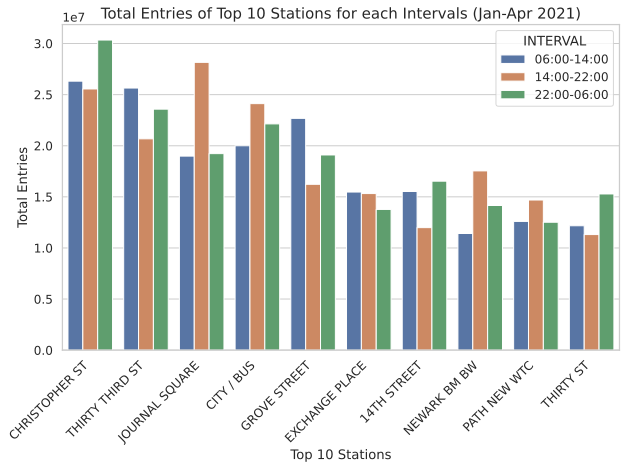

In [165]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")


chart = sns.barplot(x='STATION', y='ENTRIES', data=merged_station2, hue='INTERVAL', palette=["C0", "C1", "C2"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

chart.set(xlabel='Top 10 Stations', ylabel='Total Entries')

plt.title('Total Entries of Top 10 Stations for each Intervals (Jan-Apr 2021)', fontsize=15)
;

# Below are another dataset for 2018(Jan - April)

In [7]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [180113, 180120, 180127, 
             180203, 180210, 180217, 180224,
             180303, 180310, 180317, 180324, 180331,
             180407]
turnstiles_df_2018 = get_data(week_nums)



In [8]:
turnstiles_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579945 entries, 0 to 196987
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [45]:
turnstiles_df_2018["DATE_TIME"] = pd.to_datetime(turnstiles_df_2018.DATE + " " + turnstiles_df_2018.TIME,
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles_df_2018.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,03:00:00,REGULAR,6470216,2190123,2018-01-06 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,07:00:00,REGULAR,6470223,2190140,2018-01-06 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,11:00:00,REGULAR,6470256,2190229,2018-01-06 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,15:00:00,REGULAR,6470379,2190299,2018-01-06 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/06/2018,19:00:00,REGULAR,6470665,2190366,2018-01-06 19:00:00


In [46]:
# Get rid of the duplicate entry
turnstiles_df_2018.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df_2018.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [47]:
turnstiles_df_2018 = turnstiles_df_2018.drop(["EXITS", "DESC"], axis=1, errors="ignore")
turnstiles_df_2018.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
196987,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,21:00:00,2870062,385749,2018-04-06 21:00:00
196986,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,17:00:00,2869949,385744,2018-04-06 17:00:00
196985,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,13:00:00,2869816,385739,2018-04-06 13:00:00
196984,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,09:00:00,2869735,385736,2018-04-06 09:00:00
196983,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,04/06/2018,05:00:00,2869725,385736,2018-04-06 05:00:00


In [48]:
turnstiles_daily_2018 = (turnstiles_df_2018
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily_2018

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/06/2018,6470809
1,A002,R051,02-00-00,59 ST,01/07/2018,6471327
2,A002,R051,02-00-00,59 ST,01/08/2018,6472747
3,A002,R051,02-00-00,59 ST,01/09/2018,6474254
4,A002,R051,02-00-00,59 ST,01/10/2018,6475767
...,...,...,...,...,...,...
428096,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/02/2018,2868821
428097,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/03/2018,2869099
428098,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/04/2018,2869441
428099,TRAM2,R469,00-03-01,RIT-ROOSEVELT,04/05/2018,2869706


In [49]:
turnstiles_daily_2018[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_2018
                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                    .shift(1))
turnstiles_daily_2018.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/06/2018,6470809,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/07/2018,6471327,01/06/2018,6470809.0
2,A002,R051,02-00-00,59 ST,01/08/2018,6472747,01/07/2018,6471327.0
3,A002,R051,02-00-00,59 ST,01/09/2018,6474254,01/08/2018,6472747.0
4,A002,R051,02-00-00,59 ST,01/10/2018,6475767,01/09/2018,6474254.0


In [50]:
turnstiles_daily_2018.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [51]:
(turnstiles_daily_2018[turnstiles_daily_2018["ENTRIES"] < turnstiles_daily_2018["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         90
             01-00-04  57 ST-7 AV          1
A025   R023  01-03-01  34 ST-HERALD SQ    90
             01-03-02  34 ST-HERALD SQ    82
A035   R170  00-00-00  14 ST-UNION SQ      1
                                          ..
R625   R062  01-06-01  CROWN HTS-UTICA     1
R646   R110  01-00-01  FLATBUSH AV-B.C    90
R730   R431  00-00-04  EASTCHSTER/DYRE    87
TRAM2  R469  00-00-01  RIT-ROOSEVELT       1
             00-03-00  RIT-ROOSEVELT       1
Length: 200, dtype: int64

In [52]:
def get_daily_counts_2018(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily_2018["DAILY_ENTRIES"] = turnstiles_daily_2018.apply(get_daily_counts_2018, axis=1, max_counter=1000000)

entries: 113 <-- 34435521.0
entries: 102 <-- 1139390.0
entries: 755036314 <-- 2951090.0
entries: 9 <-- 4912436.0
entries: 2723253 <-- 1090676678.0
entries: 313 <-- 2730404.0
entries: 128 <-- 3793069.0
entries: 1900692 <-- 18567.0
entries: 1310 <-- 8558467.0
entries: 591606 <-- 7640368.0
entries: 197297 <-- 4768168.0
entries: 1083 <-- 2194726.0
entries: 2084 <-- 1417277.0
entries: 510 <-- 508202804.0
entries: 3962 <-- 5026028.0
entries: 236 <-- 3136681.0
entries: 525815 <-- 5581498.0
entries: 1530 <-- 7331536.0
entries: 92 <-- 2172980.0
entries: 841 <-- 2619920.0
entries: 477 <-- 2028194.0
entries: 602 <-- 1613963.0
entries: 112 <-- 3917556.0
entries: 17 <-- 5506547.0
entries: 667 <-- 68743106.0
entries: 494 <-- 2911426.0
entries: 2231 <-- 8641557.0
entries: 1190510 <-- 104165.0
entries: 724632 <-- 5506544.0
entries: 153 <-- 2086049.0
entries: 67168490 <-- 117556813.0
entries: 888 <-- 6945572.0
entries: 50 <-- 4396713.0
entries: 3665 <-- 5517544.0
entries: 809 <-- 11317267.0
entries: 45

In [53]:
turnstiles_df_2018.sort_values(by = ["DATE", "DATE_TIME"], ascending=[False, False], inplace=True)
turnstiles_df_2018

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
114003,PTH05,R543,00-04-08,EXCHANGE PLACE,1,PTH,04/06/2018,23:59:03,1,10030,2018-04-06 23:59:03
115030,PTH07,R550,00-01-04,CITY / BUS,1,PTH,04/06/2018,23:58:32,12970,5148,2018-04-06 23:58:32
118087,PTH17,R541,01-00-05,THIRTY THIRD ST,1,PTH,04/06/2018,23:57:20,2622856,1707477,2018-04-06 23:57:20
121279,PTH22,R540,00-01-00,PATH NEW WTC,1,PTH,04/06/2018,23:55:36,26058,5835,2018-04-06 23:55:36
111330,PTH02,R544,00-04-05,HARRISON,1,PTH,04/06/2018,23:54:26,8958,273209,2018-04-06 23:54:26
...,...,...,...,...,...,...,...,...,...,...,...
4900,A033,R170,02-00-04,14 ST-UNION SQ,LNQR456W,BMT,01/06/2018,00:00:00,3330833,2536682,2018-01-06 00:00:00
4857,A033,R170,02-00-03,14 ST-UNION SQ,LNQR456W,BMT,01/06/2018,00:00:00,4919980,5717442,2018-01-06 00:00:00
4814,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,01/06/2018,00:00:00,13395299,12849668,2018-01-06 00:00:00
4771,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,01/06/2018,00:00:00,1168494,1449353,2018-01-06 00:00:00


In [54]:
# ideal interval(8 hours interval) that was used for the project

def commute_interval_2018(DATE_TIME):
    if DATE_TIME.hour >= 6 and DATE_TIME.hour < 14:
        return '06:00-14:00'
    elif DATE_TIME.hour >= 14 and DATE_TIME.hour < 22:
        return '14:00-22:00'
    elif DATE_TIME.hour >= 22 and DATE_TIME.hour < 24:
        return '22:00-06:00'
    elif DATE_TIME.hour >= 0 and DATE_TIME.hour < 6:
        return '22:00-06:00'
    else:
        return 'GO HOME'

In [55]:
# .apply the 4 intervals to the dataset
turnstiles_df_2018['INTERVAL'] = turnstiles_df_2018.DATE_TIME.apply(commute_interval_2018)

In [56]:
turnstiles_interval_2018 = (turnstiles_df_2018
                        .groupby(["STATION", "DATE", "INTERVAL"],as_index=False)
                        .ENTRIES.first())
turnstiles_interval_2018

,STATION,DATE,INTERVAL,ENTRIES
0,1 AV,01/06/2018,06:00-14:00,1628210707
1,1 AV,01/06/2018,14:00-22:00,1628212135
2,1 AV,01/06/2018,22:00-06:00,1628212832
3,1 AV,01/07/2018,06:00-14:00,1628213422
4,1 AV,01/07/2018,14:00-22:00,1628214659
...,...,...,...,...
101646,ZEREGA AV,04/05/2018,14:00-22:00,39
101647,ZEREGA AV,04/05/2018,22:00-06:00,39
101648,ZEREGA AV,04/06/2018,06:00-14:00,39
101649,ZEREGA AV,04/06/2018,14:00-22:00,39


In [57]:
turnstiles_interval_2018[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_interval_2018
                                                       .groupby(["STATION", "INTERVAL"])[["DATE", "ENTRIES"]]
                                                       .shift(1))

In [58]:
# Drop the rows for the earliest date in the df
turnstiles_interval_2018.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

# Take care of Reverse Entries

In [59]:
turnstiles_interval_2018[turnstiles_interval_2018["ENTRIES"] < turnstiles_interval_2018["PREV_ENTRIES"]].head()

,STATION,DATE,INTERVAL,ENTRIES,PREV_DATE,PREV_ENTRIES
320,103 ST,01/21/2018,22:00-06:00,7996281,01/20/2018,1.052880e+07
411,103 ST,02/21/2018,06:00-14:00,8035830,02/20/2018,1.058227e+07
645,103 ST-CORONA,02/08/2018,06:00-14:00,3455459,02/07/2018,3.979584e+06
825,104 ST,01/08/2018,06:00-14:00,1681271481,01/07/2018,1.681272e+09
826,104 ST,01/08/2018,14:00-22:00,1681271411,01/07/2018,1.681272e+09


In [60]:
# See how many stations have this problem
(turnstiles_interval_2018[turnstiles_interval_2018["ENTRIES"] < turnstiles_interval_2018["PREV_ENTRIES"]]
    .groupby(["STATION"])
    .size())

STATION
103 ST               2
103 ST-CORONA        1
104 ST             267
110 ST               1
111 ST               1
                  ... 
WALL ST              3
WHITEHALL S-FRY      1
WOODHAVEN BLVD       1
WOODLAWN             2
ZEREGA AV            1
Length: 172, dtype: int64

In [61]:
def get_daily_counts2_2018(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_interval_2018["DAILY_ENTRIES"] = turnstiles_interval_2018.apply(get_daily_counts2_2018, axis=1, max_counter=1000000)

entries: 10528796 <-- 7993310.0
entries: 7996281 <-- 10528796.0
entries: 10582267 <-- 8032925.0
entries: 8035830 <-- 10582267.0
entries: 5041923 <-- 13048982.0
entries: 13053889 <-- 5041923.0
entries: 351824 <-- 3402294.0
entries: 5381229 <-- 2466419.0
entries: 2468093 <-- 5381229.0
entries: 1145596 <-- 151092483.0
entries: 1145714 <-- 151092483.0
entries: 1145738 <-- 151092483.0
entries: 4 <-- 4133315.0
entries: 4133661 <-- 244395767.0
entries: 4134354 <-- 4.0
entries: 244399170 <-- 4133661.0
entries: 244430896 <-- 4151596.0
entries: 7 <-- 6371038.0
entries: 6373304 <-- 7.0
entries: 6431067 <-- 7.0
entries: 7610714 <-- 5569291.0
entries: 5572501 <-- 7610714.0
entries: 121407558 <-- 139557352.0
entries: 121634579 <-- 6187939.0
entries: 139734883 <-- 121657985.0
entries: 121662586 <-- 139734883.0
entries: 101906647 <-- 121675962.0
entries: 121683107 <-- 101906647.0
entries: 1311444 <-- 5159400.0
entries: 5160326 <-- 1311444.0
entries: 1369168 <-- 5183544.0
entries: 5184603 <-- 1369168.0

entries: 9575620 <-- 151443315.0
entries: 117441596 <-- 3.0
entries: 117441597 <-- 3.0
entries: 117441596 <-- 3.0
entries: 3 <-- 117441598.0
entries: 3 <-- 117441600.0
entries: 3 <-- 117441600.0
entries: 236972 <-- 4255173.0
entries: 4256777 <-- 236972.0
entries: 6308093 <-- 2561823.0
entries: 2563639 <-- 6308093.0
entries: 67188553 <-- 3214097.0
entries: 3216049 <-- 67188553.0
entries: 6415217 <-- 1.0
entries: 4692584 <-- 1997021.0
entries: 1997691 <-- 4692584.0
entries: 2992233 <-- 9259597.0
entries: 9263032 <-- 2992233.0
entries: 2388763 <-- 1.0
entries: 602760 <-- 2388763.0
entries: 92300 <-- 1140927.0
entries: 2396084 <-- 250389.0
entries: 20369 <-- 2396084.0
entries: 2400461 <-- 327600.0
entries: 348028 <-- 2400461.0
entries: 2401519 <-- 1.0
entries: 348445 <-- 2401519.0
entries: 2077900 <-- 2008.0
entries: 1 <-- 2406708.0
entries: 2412150 <-- 1593.0
entries: 24421 <-- 2412150.0
entries: 2418371 <-- 3683.0
entries: 7706 <-- 2418371.0
entries: 2429342 <-- 7606.0
entries: 11320 <--

In [62]:
turnstiles_interval_2018.DAILY_ENTRIES.describe()

count    100532.000000
mean      12269.648828
std       74241.238775
min           0.000000
25%          99.000000
50%         753.500000
75%        1600.000000
max      997125.000000
Name: DAILY_ENTRIES, dtype: float64

In [63]:
turnstiles_interval_2018

,STATION,DATE,INTERVAL,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3,1 AV,01/07/2018,06:00-14:00,1628213422,01/06/2018,1.628211e+09,2715.0
4,1 AV,01/07/2018,14:00-22:00,1628214659,01/06/2018,1.628212e+09,2524.0
5,1 AV,01/07/2018,22:00-06:00,1628215308,01/06/2018,1.628213e+09,2476.0
6,1 AV,01/08/2018,06:00-14:00,1628216201,01/07/2018,1.628213e+09,2779.0
7,1 AV,01/08/2018,14:00-22:00,1628218259,01/07/2018,1.628215e+09,3600.0
...,...,...,...,...,...,...,...
101646,ZEREGA AV,04/05/2018,14:00-22:00,39,04/04/2018,3.900000e+01,0.0
101647,ZEREGA AV,04/05/2018,22:00-06:00,39,04/04/2018,3.900000e+01,0.0
101648,ZEREGA AV,04/06/2018,06:00-14:00,39,04/05/2018,3.900000e+01,0.0
101649,ZEREGA AV,04/06/2018,14:00-22:00,39,04/05/2018,3.900000e+01,0.0


In [64]:
station_turnstiles_interval_2018 = turnstiles_interval_2018.groupby(["STATION", "DATE", "INTERVAL"])["DAILY_ENTRIES"].sum().reset_index()
station_turnstiles_interval_2018.head(10)

,STATION,DATE,INTERVAL,DAILY_ENTRIES
0,1 AV,01/07/2018,06:00-14:00,2715.0
1,1 AV,01/07/2018,14:00-22:00,2524.0
2,1 AV,01/07/2018,22:00-06:00,2476.0
3,1 AV,01/08/2018,06:00-14:00,2779.0
4,1 AV,01/08/2018,14:00-22:00,3600.0
5,1 AV,01/08/2018,22:00-06:00,3396.0
6,1 AV,01/09/2018,06:00-14:00,3122.0
7,1 AV,01/09/2018,14:00-22:00,2867.0
8,1 AV,01/09/2018,22:00-06:00,3542.0
9,1 AV,01/10/2018,06:00-14:00,3927.0


In [65]:
# investigate total entries for each station for different interval
station_interval_2018 = station_turnstiles_interval_2018 \
                    .groupby(["STATION", "INTERVAL"], as_index=False)["DAILY_ENTRIES"].sum()
station_interval_2018.rename(columns= {'DAILY_ENTRIES':'ENTRIES'}, inplace=True)
station_interval_2018

,STATION,INTERVAL,ENTRIES
0,1 AV,06:00-14:00,342634.0
1,1 AV,14:00-22:00,343321.0
2,1 AV,22:00-06:00,339794.0
3,103 ST,06:00-14:00,110822.0
4,103 ST,14:00-22:00,114412.0
...,...,...,...
1114,YORK ST,14:00-22:00,187705.0
1115,YORK ST,22:00-06:00,185227.0
1116,ZEREGA AV,06:00-14:00,160.0
1117,ZEREGA AV,14:00-22:00,0.0


In [66]:
top_station_2018 = (station_interval_2018
    .groupby(["STATION"])
    .ENTRIES.sum()
    .reset_index()
    .sort_values("ENTRIES", ascending=False))
top_station_2018.rename(columns= {'ENTRIES':'TOTAL_ENTRIES'}, inplace=True)
top_station_2018

,STATION,TOTAL_ENTRIES
351,TWENTY THIRD ST,89548779.0
17,14TH STREET,84403643.0
312,PAVONIA/NEWPORT,73931762.0
346,THIRTY ST,72070665.0
347,THIRTY THIRD ST,69575346.0
...,...,...
307,PARKCHESTER,0.0
305,OZONE PK LEFFRT,0.0
207,ELDER AV,0.0
328,ROCKAWAY PARK B,0.0


In [67]:
# merge tables that have the total entries for unique station
merged_station_2018 = pd.merge(station_interval_2018, top_station_2018, on='STATION')
merged_station_2018

,STATION,INTERVAL,ENTRIES,TOTAL_ENTRIES
0,1 AV,06:00-14:00,342634.0,1025749.0
1,1 AV,14:00-22:00,343321.0,1025749.0
2,1 AV,22:00-06:00,339794.0,1025749.0
3,103 ST,06:00-14:00,110822.0,335616.0
4,103 ST,14:00-22:00,114412.0,335616.0
...,...,...,...,...
1114,YORK ST,14:00-22:00,187705.0,558803.0
1115,YORK ST,22:00-06:00,185227.0,558803.0
1116,ZEREGA AV,06:00-14:00,160.0,160.0
1117,ZEREGA AV,14:00-22:00,0.0,160.0


In [68]:
merged_station_2018

,STATION,INTERVAL,ENTRIES,TOTAL_ENTRIES
0,1 AV,06:00-14:00,342634.0,1025749.0
1,1 AV,14:00-22:00,343321.0,1025749.0
2,1 AV,22:00-06:00,339794.0,1025749.0
3,103 ST,06:00-14:00,110822.0,335616.0
4,103 ST,14:00-22:00,114412.0,335616.0
...,...,...,...,...
1114,YORK ST,14:00-22:00,187705.0,558803.0
1115,YORK ST,22:00-06:00,185227.0,558803.0
1116,ZEREGA AV,06:00-14:00,160.0,160.0
1117,ZEREGA AV,14:00-22:00,0.0,160.0


In [69]:
# Order Station by top 10 total_entries

merged_station_2018.sort_values("TOTAL_ENTRIES", ascending=False, inplace=True)
merged_station2_2018 = merged_station_2018.iloc[:30]
merged_station2_2018


,STATION,INTERVAL,ENTRIES,TOTAL_ENTRIES
1053,TWENTY THIRD ST,06:00-14:00,30840132.0,89548779.0
1055,TWENTY THIRD ST,22:00-06:00,28995960.0,89548779.0
1054,TWENTY THIRD ST,14:00-22:00,29712687.0,89548779.0
52,14TH STREET,14:00-22:00,29986677.0,84403643.0
51,14TH STREET,06:00-14:00,25695808.0,84403643.0
53,14TH STREET,22:00-06:00,28721158.0,84403643.0
936,PAVONIA/NEWPORT,06:00-14:00,28158225.0,73931762.0
937,PAVONIA/NEWPORT,14:00-22:00,20665282.0,73931762.0
938,PAVONIA/NEWPORT,22:00-06:00,25108255.0,73931762.0
1040,THIRTY ST,22:00-06:00,23768325.0,72070665.0


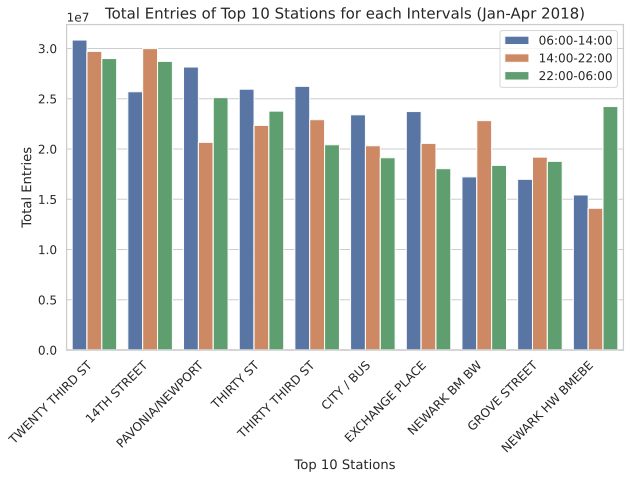

In [166]:
plt.figure(figsize=(10,6))


sns.set_style("whitegrid")
chart = sns.barplot(x='STATION', y='ENTRIES', data=merged_station2_2018, hue='INTERVAL', palette=["C0", "C1", "C2"],
                   hue_order = ['06:00-14:00', '14:00-22:00', '22:00-06:00'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

chart.set(xlabel='Top 10 Stations', ylabel='Total Entries')

plt.title('Total Entries of Top 10 Stations for each Intervals (Jan-Apr 2018)', fontsize=15)
plt.legend(loc="upper right");